In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('wine-clustering.csv')

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
df.shape

(178, 13)

# K-Means

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

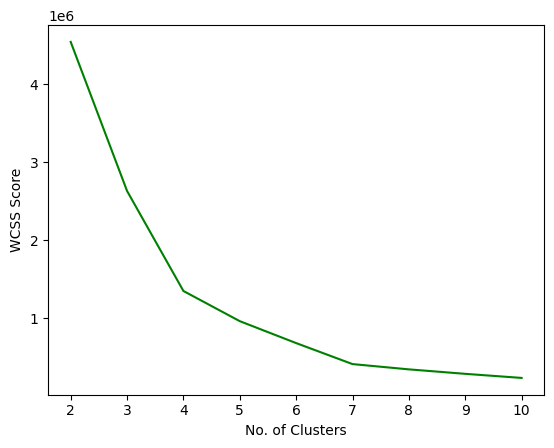

In [7]:
X_axis = [i for i in range(2,11)]
y_axis = wcss

plt.plot(X_axis,y_axis, c='green')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS Score')
plt.show()

## By Elbow method, the optimal no. of clusters is found to be **3**

In [8]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=42)
y_pred = kmeans.fit_predict(df)

In [9]:
y_pred

array([1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0])

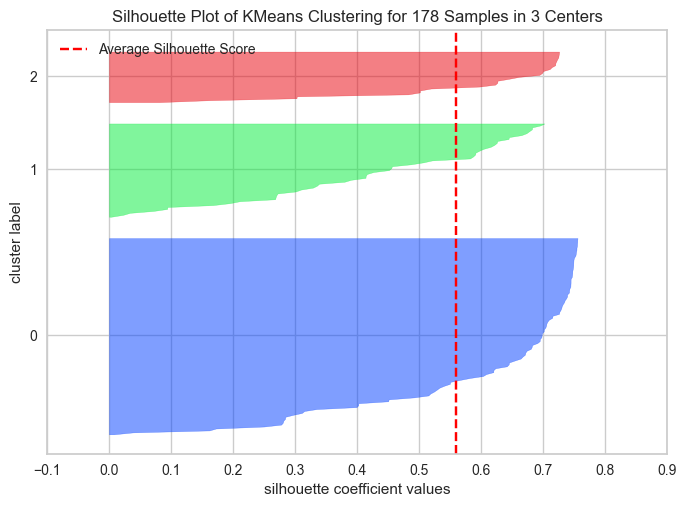

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 178 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [10]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(kmeans, colors="sns_bright")
visualizer.fit(df)
visualizer.show()

In [11]:
y_pred

array([1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0])

In [12]:
X = np.array(df)

In [13]:
kmeans.cluster_centers_

array([[1.25985294e+01, 2.45343137e+00, 2.32186275e+00, 2.06460784e+01,
        9.36960784e+01, 2.05362745e+00, 1.64754902e+00, 3.95980392e-01,
        1.42509804e+00, 4.67333332e+00, 9.17843137e-01, 2.39480392e+00,
        5.21558824e+02],
       [1.33691837e+01, 2.40000000e+00, 2.39265306e+00, 1.85142857e+01,
        1.09081633e+02, 2.44163265e+00, 2.21367347e+00, 3.25510204e-01,
        1.70673469e+00, 5.18836735e+00, 9.59714286e-01, 2.84795918e+00,
        9.06346939e+02],
       [1.38507407e+01, 1.77851852e+00, 2.48777778e+00, 1.69259259e+01,
        1.05629630e+02, 2.94148148e+00, 3.13666667e+00, 2.98888889e-01,
        2.00703704e+00, 6.27518519e+00, 1.10296296e+00, 3.00222222e+00,
        1.30877778e+03]])

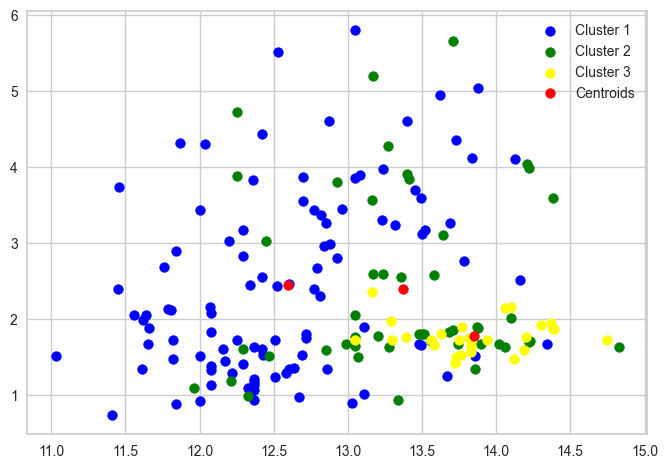

In [14]:
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1],c='blue',s=50,label='Cluster 1')
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1],c='green',s=50,label='Cluster 2')
plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1],c='yellow',s=50,label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=50, label='Centroids' )
plt.legend()
plt.show()

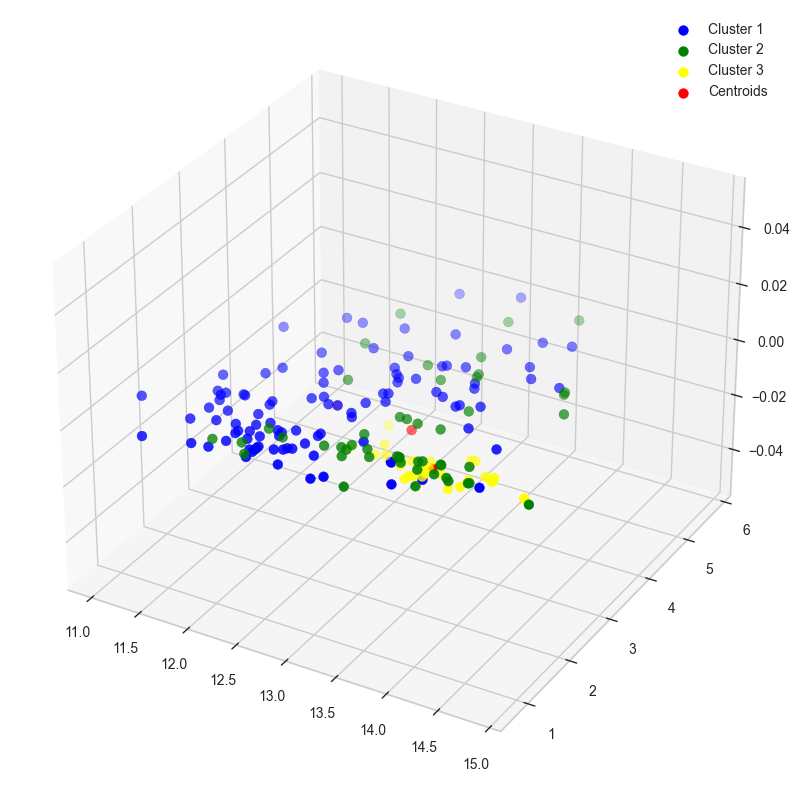

In [15]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1],c='blue',s=50,label='Cluster 1')
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1],c='green',s=50,label='Cluster 2')
plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1],c='yellow',s=50,label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=50, label='Centroids' )
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import silhouette_score
silhouette_score(X, y_pred)

0.5595823478987215

# Hierarchical/ Agglomerative Clustering

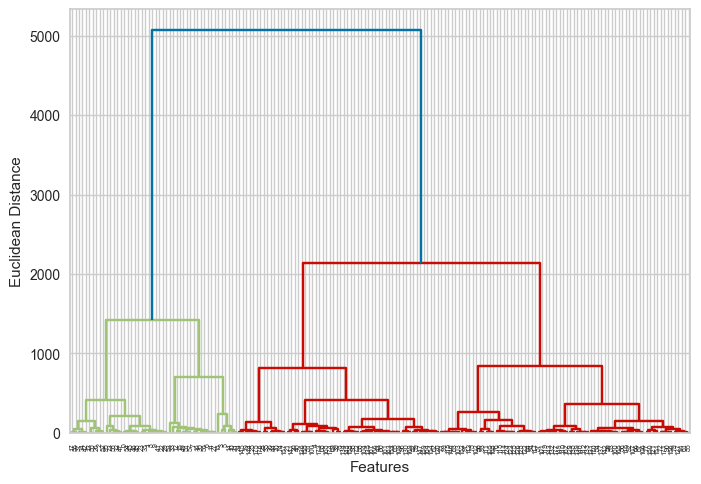

In [17]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.xlabel('Features')
plt.ylabel('Euclidean Distance')
plt.show()

### From the Dendrogram, the optimal no. of clusters is **3**

In [18]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_pred = agg.fit_predict(X)

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [ ]:
y_pred

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

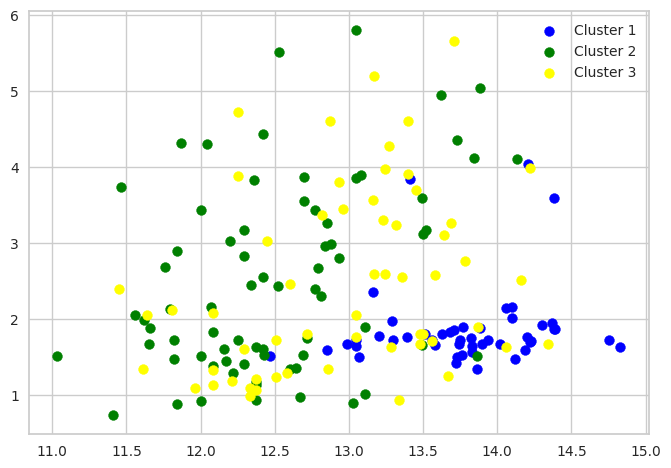

In [ ]:
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1],c='blue',s=50,label='Cluster 1')
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1],c='green',s=50,label='Cluster 2')
plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1],c='yellow',s=50,label='Cluster 3')
plt.legend()
plt.show()